In [1]:
#Importing libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [2]:
#import Data 
df = pd.read_csv("./day.csv") 
print(df.shape)
df.head()

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
##understand what is the % of null values in each column
df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [5]:
# get insights of numeric variable
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#dropping the columns
#instant'--its an index
#'dteday'--date which is further broken in month year
#'casual','registered' - these both have cummulative value to cnt
df.drop(['instant', 'dteday','casual','registered'], axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [8]:
df.shape

(730, 12)

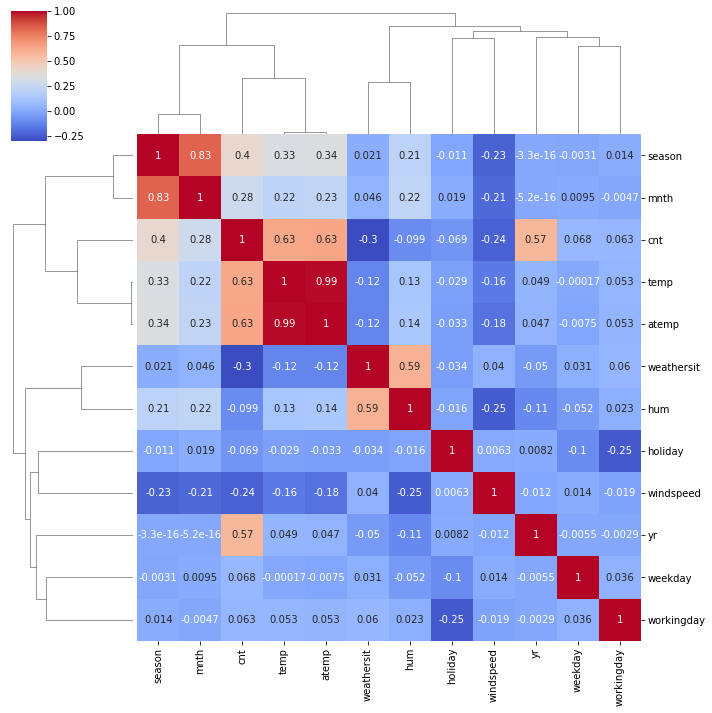

In [9]:
#to check the correaltion between continous varibales using heat map
sns_plot = sns.clustermap(df.corr(), cmap='coolwarm', annot=True)

In [10]:
#dropping atemp and both are quite co-related and almost similar information
df.drop(['atemp'], axis=1, inplace=True)

In [11]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
df.shape

(730, 11)

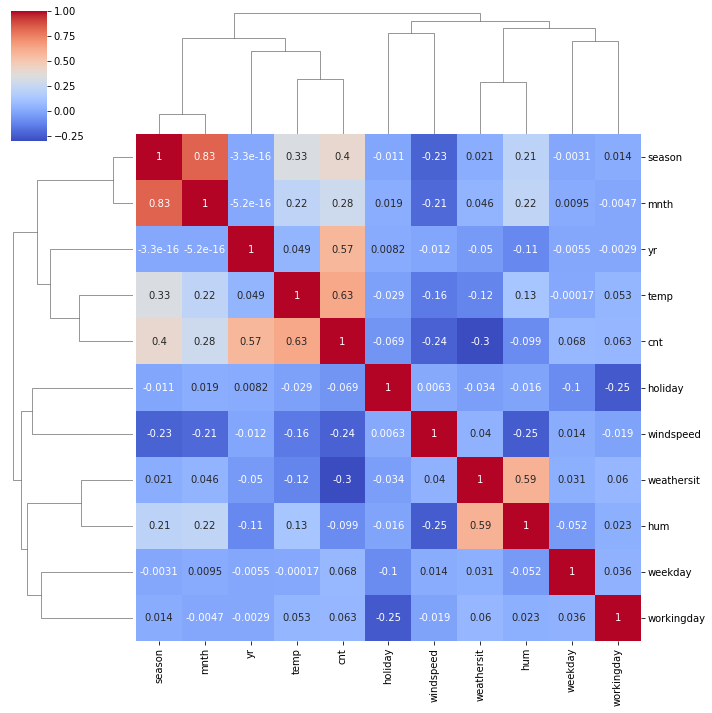

In [13]:
# to check the correaltion between continous varibales using heat map after dropping atemp
sns_plot = sns.clustermap(df.corr(), cmap='coolwarm', annot=True)

Observation on above heatmap
there is a positive correalation between cnt and temp i.e. 0.63
there is a Negative correlation between cnt and hum i.e. -0.099
there is a Negative correlation between cnt and windspeed i.e. -0.24

<AxesSubplot:xlabel='temp', ylabel='cnt'>

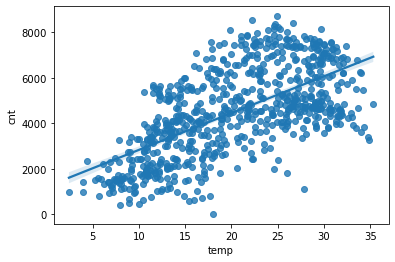

In [14]:
#visualize the data
sns.regplot(x="temp",y="cnt", data=df)

<AxesSubplot:xlabel='season', ylabel='cnt'>

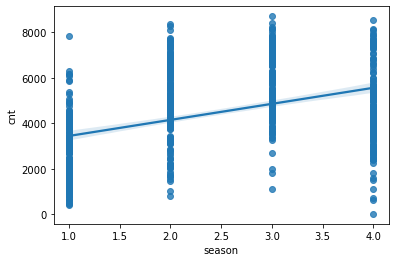

In [15]:
#can only be applied on continuous variables
sns.regplot(x="season",y="cnt", data=df)

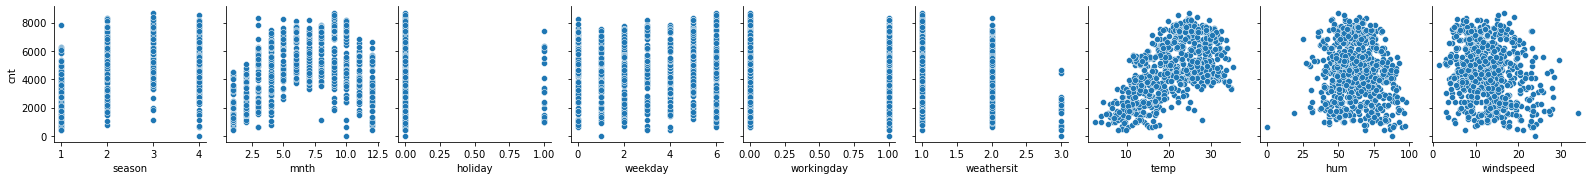

In [16]:
#analyze num var
sns.pairplot(data=df,x_vars=['season','mnth','holiday','weekday','workingday','weathersit','temp', 'hum', 'windspeed'],y_vars='cnt')

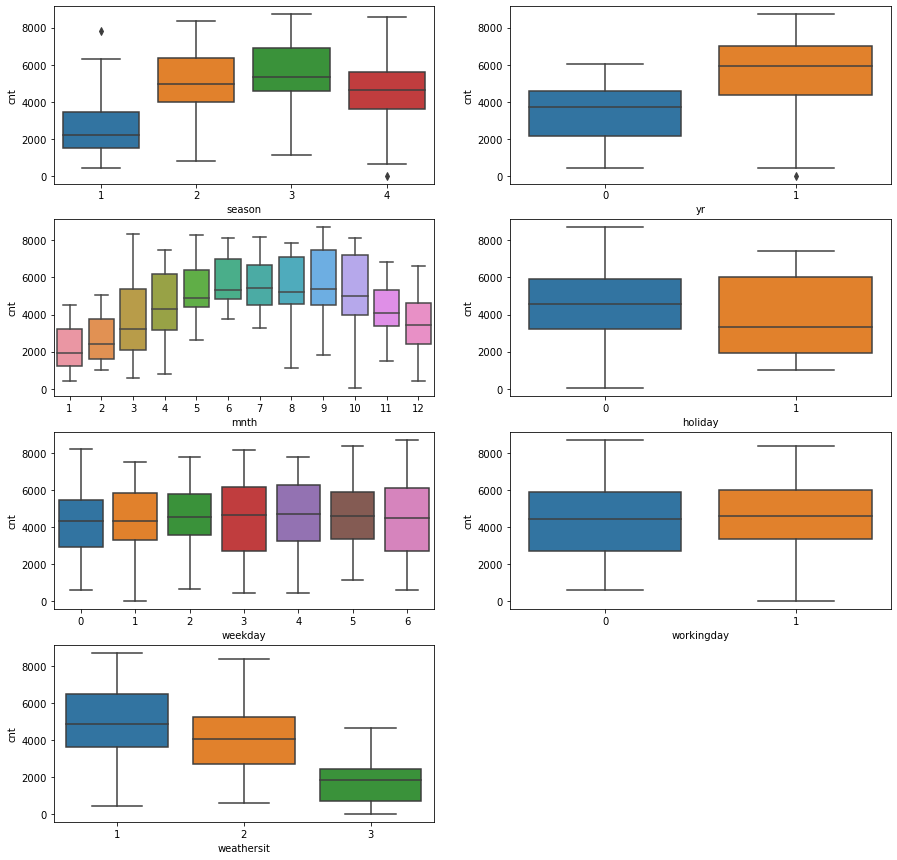

In [17]:
#analyze cat variable
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

Bikes are less in demand in the spring than other seasons
Demand increased in 2019 from 2018.
Jun to Sep - demand is high and Jan - lowest demand
demand is less in holidays.
weekdays- demand is almost similar.
No specific change in demand with workign day and non working day.
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy ---demand is high
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ---compratively less demand
        - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist -very less demand
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog -not much data probably no demand 

In [18]:
#mapping 
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'})
df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

# creating dummy var
dummy_vars = pd.get_dummies(df[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
df = pd.concat([df,dummy_vars], axis = 1)

# drop original columns for which dummy variables have been created
df.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [19]:
df.shape

(730, 29)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_spring                   730 non-null    uint8  
 8   season_summer                   730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Sat                     730 non-null    uint8  
 12  weekday_Sun                     730 

In [21]:
# Split train test dataset
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 10 )
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [22]:
# identify categorical variables
cat_vars = ['yr','holiday','workingday']

# identify numeric variables
num_vars = ['temp', 'hum','windspeed','cnt']
# yr, holiday and workign day columns are int64 but these data are 0 and 1. So will convert these data type to uint8
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_spring                   730 non-null    uint8  
 8   season_summer                   730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Sat                     730 non-null    uint8  
 12  weekday_Sun                     730 

In [23]:
# Scaling of train set

# instantiate an object
scaler = MinMaxScaler()

# fit and transform on training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
72,0,0,1,0.298094,0.393891,0.236118,0.194978,1,0,0,...,0,0,0,1,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,0,1,0,...,0,0,0,0,1,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,0,0,0,0,0,1
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,0,0,...,0,0,0,0,0,0,0,1,0,1
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# check test dataset before scaling
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1,0,0,24.429153,86.5417,14.291100,4459,0,0,0,...,0,1,0,0,0,0,0,0,1,0
374,1,0,1,12.656536,64.6522,12.565984,3598,1,0,0,...,1,0,0,0,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,5362,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,7363,0,1,0,...,0,0,1,0,0,0,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,4758,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# transform test dataset 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,0,0,...,0,1,0,0,0,0,0,0,1,0
374,1,0,1,0.276477,0.584521,0.340487,0.382349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,0,1,0,...,0,0,1,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
72,0,0,1,0.298094,0.393891,0.236118,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
264,0,0,1,0.694699,0.910249,0.217975,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
577,1,0,1,0.811368,0.624004,0.244886,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Creating X and y data dataframe for test set
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
374,1,0,1,0.276477,0.584521,0.340487,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Checking variables for for X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'],
      dtype='object')

In [29]:
# Running RFE to select 15 number of varibles
# Create object
lm = LinearRegression()
# fit model
lm.fit(X_train, y_train)
# run RFE
rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_LightSnow_LightRain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [30]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [32]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [33]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          7.66e-190
Time:                        11:52:44   Log-Likelihood:                 490.56
No. Observations:                 510   AIC:                            -949.1
Df Residuals:                     494   BIC:                            -881.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

pvalues for all the varibles are < 0.05 so we will remove column hum as it is having high VIF

In [34]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.59e-186
Time:                        11:52:55   Log-Likelihood:                 479.90
No. Observations:                 510   AIC:                            -929.8
Df Residuals:                     495   BIC:                            -866.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping feature hum there is no significant change in R-squared or adj. R2-squared. So decissionto drop the varibale is correct.
pvalues for all the varibles are < 0.05 and VIF is also below 5 for all features so we will remove feature which is having highest p vaule i.e. mnth_feb .009

In [35]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_feb'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.22e-186
Time:                        11:53:06   Log-Likelihood:                 476.42
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     496   BIC:                            -865.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping feature mnth_feb there is no significant change in R-squared or adj. R2-squared. 
So decission to drop the varibale is correct.
pvalues for all the varibles are < 0.05 and VIF is also below 5 for all features so we will remove feature 
which is having highest p vaule i.e. mnth_sep .007

In [36]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_sep'],axis = 1)

# Create stats model and look for summary
lm_4 = sm_linearmodel(X_train_new)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          7.88e-186
Time:                        11:53:13   Log-Likelihood:                 472.71
No. Observations:                 510   AIC:                            -919.4
Df Residuals:                     497   BIC:                            -864.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping feature mnth_sep there is no significant change in R-squared or adj. R2-squared. 
So decission to drop the varibale is correct.
pvalues for all the varibles are < 0.05 and VIF is also below 5 for all features so we will remove feature 
which is having highest p vaule i.e. mnth_jan .003

In [37]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_jan'],axis = 1)

# Create stats model and look for summary
lm_5 = sm_linearmodel(X_train_new)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.66e-185
Time:                        11:53:20   Log-Likelihood:                 468.32
No. Observations:                 510   AIC:                            -912.6
Df Residuals:                     498   BIC:                            -861.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

After dropping feature mnth_jan there is no significant change in R-squared or adj. R2-squared. 
So decission to drop the varibale is correct.
pvalues for all the varibles are < 0.05 and VIF is also below 5 for all features 

So we will choose lm_5 as our final model.

In [38]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_5

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy']

Coefficent for the variables are:
const                             0.269
yr                                0.256
holiday                          -0.081
temp                              0.414
windspeed                        -0.137
season_spring                    -0.142
season_winter                     0.080
mnth_dec                         -0.058
mnth_jul                         -0.073
mnth_nov                         -0.079
weathersit_LightSnow_LightRain   -0.266
weathersit_Mist_Cloudy           -0.084
dtype: float64


The final varibles are: 'yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_nov', 'weathersit_LightSnow_LightRain', 'weathersit_Mist_Cloudy'

In [39]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [40]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

C:\Users\gpandey\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


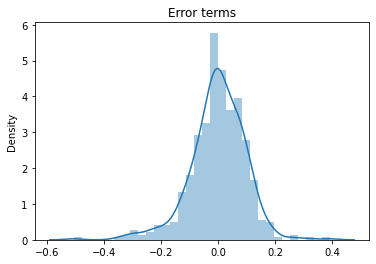

In [41]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

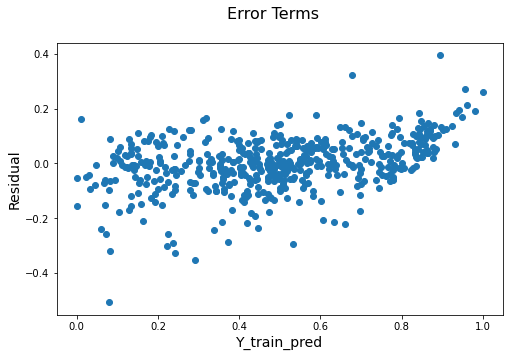

In [42]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

It seems like the corresponding residual plot is reasonably random.
Also the error terms satisfies to have reasonably constant variance (homoscedasticity)
Next we will check model on test dataset

In [43]:
# check dataframe for the test set
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,weekday_Mon,...,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1,0,0,0.652175,0.863516,0.393568,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
374,1,0,1,0.276477,0.584521,0.340487,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_nov,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1,0,0.652175,0.393568,0,0,0,1,0,1,0
374,1,0,0.276477,0.340487,1,0,0,0,0,0,0
181,0,0,0.817910,0.165370,0,0,0,1,0,0,0
529,1,0,0.720868,0.476922,0,0,0,0,0,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0,0,0


In [45]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jul,mnth_nov,weathersit_LightSnow_LightRain,weathersit_Mist_Cloudy
566,1.0,1,0,0.652175,0.393568,0,0,0,1,0,1,0
374,1.0,1,0,0.276477,0.340487,1,0,0,0,0,0,0
181,1.0,0,0,0.817910,0.165370,0,0,0,1,0,0,0
529,1.0,1,0,0.720868,0.476922,0,0,0,0,0,0,0
233,1.0,0,0,0.777567,0.524373,0,0,0,0,0,0,0


In [46]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

In [47]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.819


In [48]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.809


In [49]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0094


C:\Users\gpandey\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


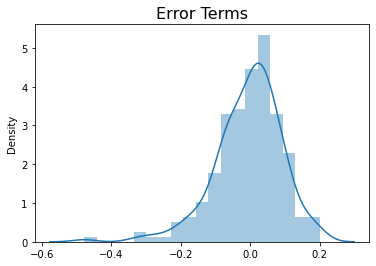

In [50]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

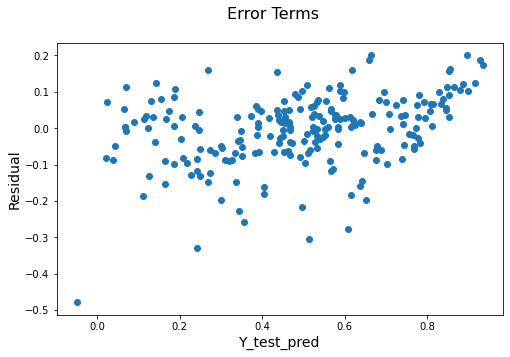

In [51]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

It seems like the corresponding residual plot is reasonably random.

Text(0, 0.5, 'y_test_pred')

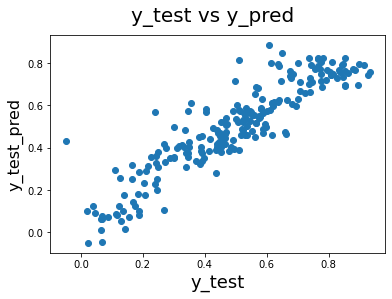

In [52]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

We can colude that the model lm_5 fit isn't by chance, and has descent predictive power.

In [53]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.83   Adj. R-Squared train: 0.829
R- Sqaured test :  0.82   Adj. R-Squared test : 0.809

Coefficent for the variables are:
const                             0.269
yr                                0.256
holiday                          -0.081
temp                              0.414
windspeed                        -0.137
season_spring                    -0.142
season_winter                     0.080
mnth_dec                         -0.058
mnth_jul                         -0.073
mnth_nov                         -0.079
weathersit_LightSnow_LightRain   -0.266
weathersit_Mist_Cloudy           -0.084
dtype: float64


The equation of our best fitted line is:
cnt=.269+(.256* yr) - (.081 * holiday) + (.414 * temp) - (.137 * windspeed) - (.142 * season_spring) + (.080 * season_winter)
    -(.058 * mnth_dec) - (.073 * mnth_jul) - (.079 * mnth_nov) - (.266 * weathersit_LightSnow_LightRain) - (.084 * weathersit_Mist_Cloudy)
    
Based on final model top three features contributing significantly towards explaining the demand are:
Temperature (0.414)
weathersit : weathersit_LightSnow_LightRain (-0.266)
year (0.256)